In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = sns.load_dataset("titanic")
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [3]:
df.columns

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town',
       'alive', 'alone'],
      dtype='object')

In [4]:
df.isna().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [16]:
df['age'].interpolate(inplace=True)
df.isna().sum()

survived         0
pclass           0
sex              0
age              0
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
familysize       0
isalone          0
agegroup         0
dtype: int64

In [6]:
df['familysize'] = df['sibsp'] + df['parch'] + 1
df['isalone'] = (df['familysize'] == 1).astype(int)
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,familysize,isalone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False,2,0
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False,2,0
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True,1,1
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False,2,0
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True,1,1


In [7]:
df.groupby('sex')['survived'].mean()

sex
female    0.742038
male      0.188908
Name: survived, dtype: float64

In [8]:
df.groupby('pclass')['survived'].mean()

pclass
1    0.629630
2    0.472826
3    0.242363
Name: survived, dtype: float64

In [9]:
max(df['age'])

80.0

In [10]:
df['agegroup']=pd.cut(df['age'],bins=[0,18,25,35,55,65,80],labels=['child','Teen','young','middle','citizen','old'])
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,familysize,isalone,agegroup
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False,2,0,Teen
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False,2,0,middle
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True,1,1,young
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False,2,0,young
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True,1,1,young


In [11]:
df.groupby('agegroup')['survived'].mean()

C:\Users\durga\AppData\Local\Temp\ipykernel_18632\2930341532.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('agegroup')['survived'].mean()


agegroup
child      0.475610
Teen       0.322751
young      0.389513
middle     0.374449
citizen    0.361111
old        0.125000
Name: survived, dtype: float64

In [12]:
df.groupby('familysize')['survived'].mean()

familysize
1     0.303538
2     0.552795
3     0.578431
4     0.724138
5     0.200000
6     0.136364
7     0.333333
8     0.000000
11    0.000000
Name: survived, dtype: float64

In [13]:
df.groupby('isalone')['survived'].mean()

isalone
0    0.505650
1    0.303538
Name: survived, dtype: float64

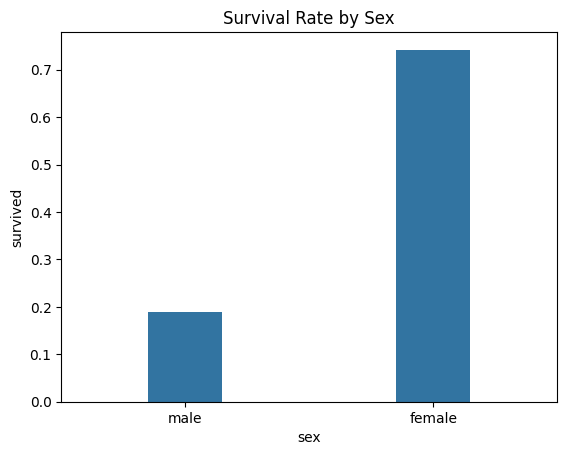

In [25]:
sns.barplot(x='sex', y='survived', data=df,width=0.3,errorbar=None)
plt.title("Survival Rate by Sex")
plt.show()


The barplot values of survival rates are the means of each gender. Females had a much higher survival rate compared to males. This shows that gender played a major role in survival outcomes, with women being far more likely to survive than men.

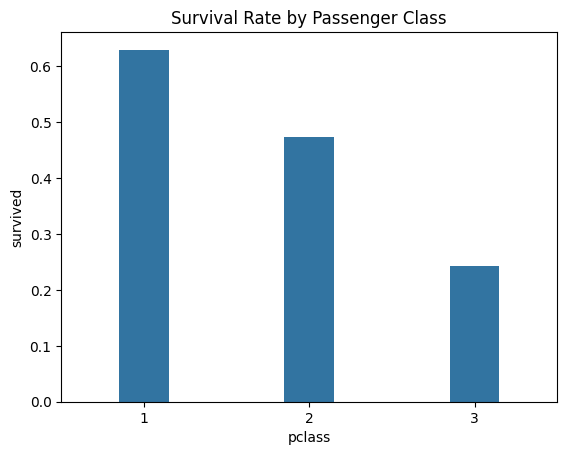

In [24]:
sns.barplot(x='pclass', y='survived', data=df,width=0.3,errorbar=None)
plt.title("Survival Rate by Passenger Class")
plt.show()

Survival rates were highest among first‑class passengers, moderate in second class, and lowest in third class. This shows that passenger class also strongly influenced survival chances, with higher‑class travellers significantly more likely to survive.

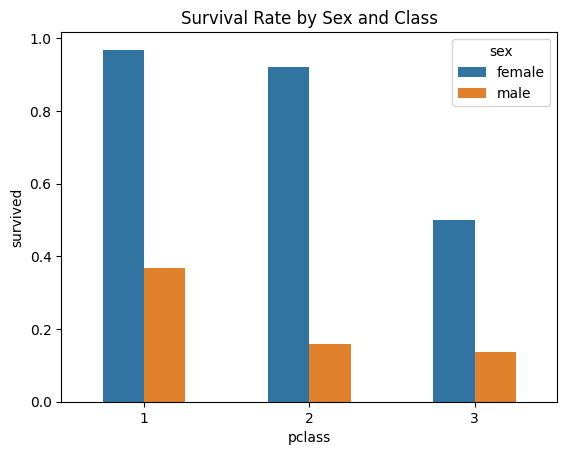

In [19]:
sns.barplot(x='pclass', y='survived', hue='sex', data=df,width=0.5,errorbar=None)
plt.title("Survival Rate by Sex and Class")
plt.show()

Survival was highest among first- and second-class females, whereas third-class females had a lower survival rate than those in the other classes. In contrast, males across all classes had significantly lower survival rates. This highlights the combined impact of gender and social class on survival outcomes.

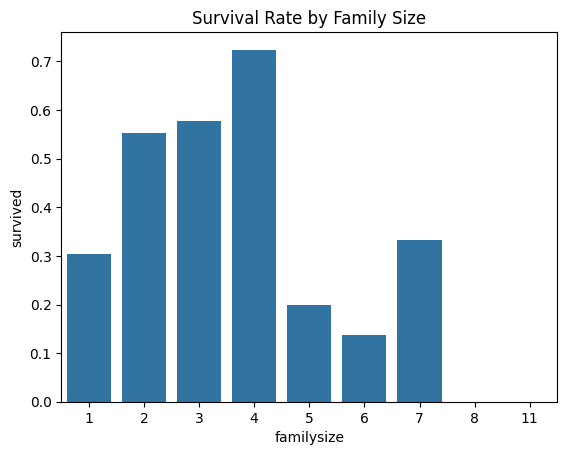

In [28]:
sns.barplot(x='familysize', y='survived', data=df,errorbar=None)
plt.title("Survival Rate by Family Size")
plt.show()

This suggests that moderate family sizes were more favorable for survival, while being alone or in very large groups reduced the likelihood of survival.


In [29]:
#Conclusion

Statistical Conclusion :

    -Women survived more, mainly due to social policy(women and children first) + class structure, not biological strength.
    -Interaction (gender and Pclass) often shows that being a woman matters most in higher classes, meaning survival advantage is partly class-dependent.


Dataset Bias Check :                                                                                                              

    -Lifeboat access depended on class location(deck).
    -Fare(ticket price) strongly depends with survival.

*The higher survival rate of women is best explained by evacuation priority and passenger class advantages, meaning survival was influenced more by social factors and dataset bias than biology.